# Step 1: Blob detection

The `lentil.png` image is a greyscale image from constructed from the red light and near infrared light channels of a multispectral camera.  (Thanks to Dr. Kirstin Bett, Dept. of Plant Sciences, College of Agriculture for the image!).  The bright blobs you see in the middle section of the image are clusters of lentil plants called plots (each plot is a different genetic lineage).  These are areas of interest for plant breeders because they want to analyze the patches of plant, while ignoring the background soil.  To do that in an automated algorithm, we first have to find the plots!

Use one of the blob detection functions described at the end of the Topic 5 lecture slides to detect the blobs in the `lentil.png` image.  Obtain the best result you can from any one of the three available functions (in `skimage.feature`), namely `blob_log()`, `blob_dog()`, or `blob_doh()`.  Try the different functions and experiment with their parameters.   Don't worry too much about the correctness of the blobs at the very top and very bottom that are outside the area of the field trial.  These are not areas of interest.

For your best result, draw the blobs as circles on the output image and display the result.    The last slide of Topic 5 gives you an example of some code that does this.  Sample output is shown in the assignment description document.

Sample output is given in the assignment document but be aware that it is not necessarily representative of the quality of the blob detection that you might achieve because I did not spend more than 5 minutes tweaking the parameters.  You should be able to do at least as well, but possibly also better.  

_Hint: as usual, it is suggested that you convert the image to dtype `float` before processing._

_Hint: the lentil field image is pretty big, so you'll need to set the figure size to something larger.  For me `plt.figure(figsize=(20,7))` worked well, but I have an almost 4K display.  Smaller may work for you._




In [83]:
import matplotlib.pyplot as plt
import skimage.feature as feat
import skimage.io as io
import skimage.util as util

In [84]:
I = io.imread('data/lentil.png', as_gray=True)
I = util.img_as_float(I)

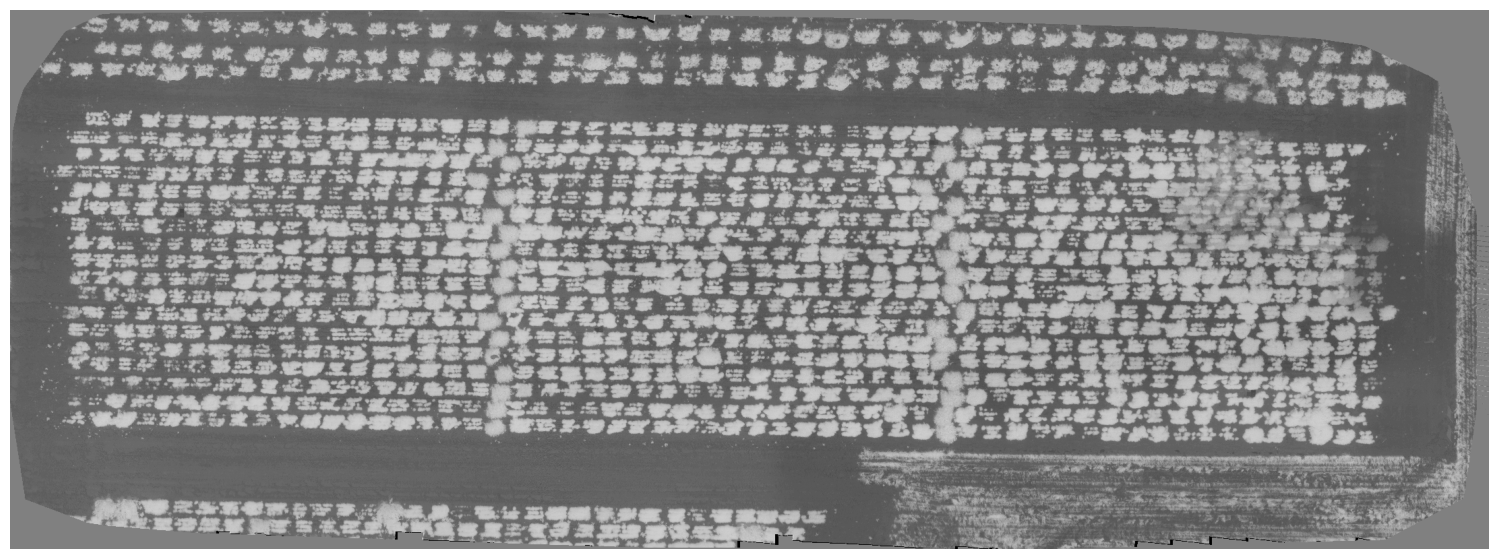

In [85]:
plt.figure(figsize=(20, 7))
plt.imshow(I, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.show()

## Blob Log

In [110]:
min_sigma = 5
max_sigma = 30
num_sigma = 25
threshold = 0.1
overlap = 0.2
log_scale = True
threshold_rel = 0.5
exclude_border = 5

blobs_log = feat.blob_log(I, min_sigma, max_sigma, num_sigma, threshold, overlap, log_scale, threshold_rel=threshold_rel, exclude_border=exclude_border)

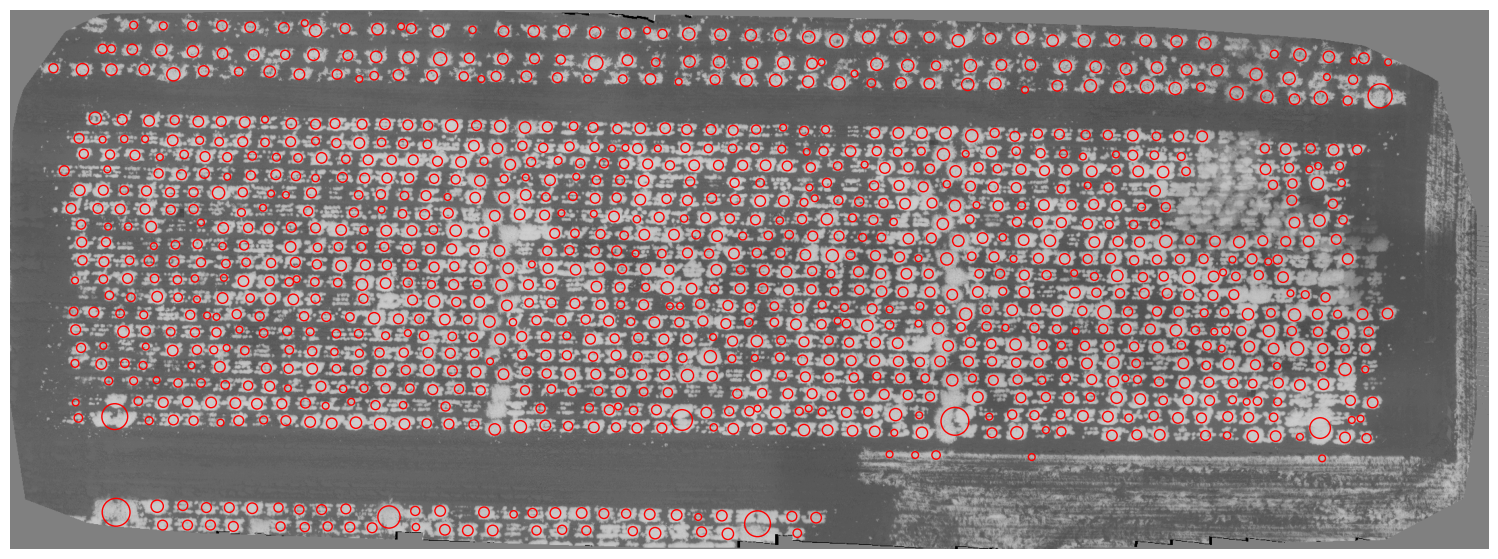

In [111]:
plt.figure(figsize=(20, 7))
plt.imshow(I, cmap='gray', vmin=0, vmax=1)
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=1, fill=False)
    plt.gca().add_patch(c)
plt.axis('off')
plt.show()

## Blob Dog

In [112]:
min_sigma = 5
max_sigma = 20
sigma_ratio = 1.2
threshold = 0.1
overlap = 0.5

blobs_dog = feat.blob_dog(I, min_sigma, max_sigma, sigma_ratio, threshold, overlap)

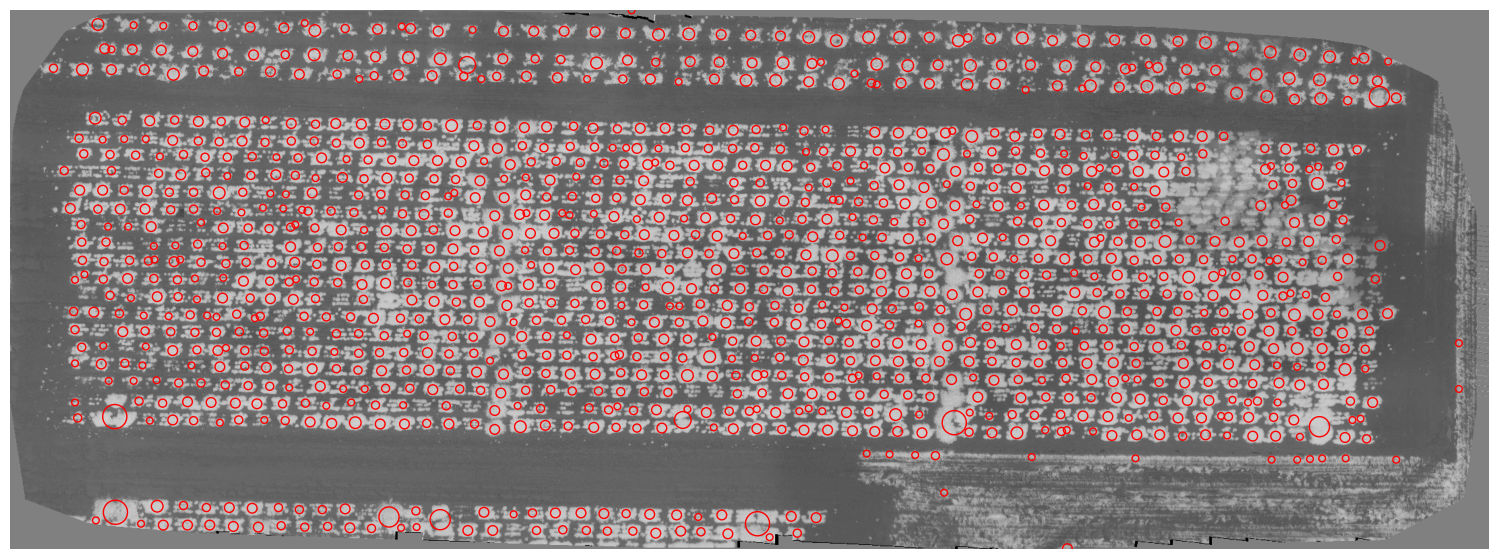

In [113]:
plt.figure(figsize=(20, 7))
plt.imshow(I, cmap='gray', vmin=0, vmax=1)
for blob in blobs_dog:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=1, fill=False)
    plt.gca().add_patch(c)
plt.axis('off')
plt.show()

## Blob Doh

In [105]:
min_sigma = 5
max_sigma = 20
num_sigma = 15
threshold = 0.1
overlap = 0.5

# blobs_doh = feat.blob_doh(I, min_sigma, max_sigma, num_sigma, threshold, overlap, threshold_rel=threshold_rel)
blobs_doh = feat.blob_doh(I)

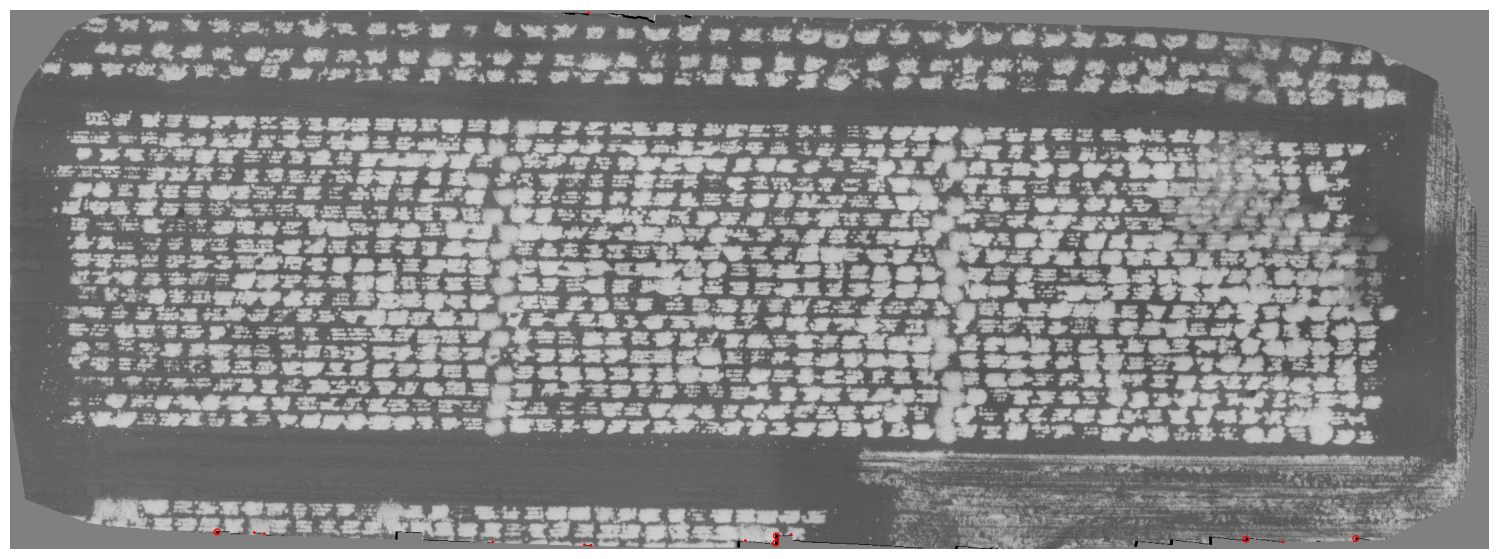

In [109]:
plt.figure(figsize=(20, 7))
plt.imshow(I, cmap='gray', vmin=0, vmax=1)
for blob in blobs_doh:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=1, fill=False)
    plt.gca().add_patch(c)
plt.axis('off')
plt.show()

# Step 2:  Thinking and Analysis

### Answer these questions, right here in this block.

1.  What properties of the image did you consider when selecting parameters for blob detection?  

    When doing the parameter selection, I considered the different sizes of blobs, so I can pick correctly the min and max sigma values. I also considered the threshold value to filter out the blobs that are not significant. At last, I considered the overlap value to avoid detecting the same blob multiple times.

2.  What kinds of errors (in terms of detecting the plots) did you observe in the detected blobs?  

	On the parts where big _plots_ are close to each other, the blobs are detected as one big blob. Also, some blobs are detected on the bottom of the image, which are not plots. Also, on the top right, there seems to be blurry _plots_ which are not detected.

3.  How might you mitigate those errors in one or more post-processing steps?

    Since this _plots_ are having problems with the ones that are too close together, some erosion might help to separate them. Also, some dilation might help to connect the blobs that are not detected as one. Also, some thresholding might help to filter out the blobs that are not significant. Lastly, do some sharpening might help help detect them better. 
